<h1>Demand Forecast</h1>

In [217]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import plotly.express as px
from epiweeks import Week
import fbprophet
import seaborn as sns
import lightgbm as lgb
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import math
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso, Ridge,LogisticRegressionCV,RidgeCV,LassoCV,ElasticNetCV,OrthogonalMatchingPursuit,ElasticNet,LassoLarsCV,BayesianRidge
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor

<h5>I have implemented different models for this problem<br></h5>
 
<b>1. Linear Regression<br></b>
Linear regression is a statistical tool used to help predict future values from past values. <br>
It is commonly used as a quantitative way to determine the underlying trend.<br>
<br>
<u>In this model I have added various features: <br></u>
    i).the week numbers,<br>
    ii).Sine & Cosine transform of week number to capture cyclic nature, <br>
    iii).Average units sold per article number,<br>
    iv).average unit price per article number.<br>
<br>
<b>2. CatBoost Regressor<br></b>
CatBoost is based on gradient boosted decision trees. During training, a set of decision trees is built consecutively. <br>
Each successive tree is built with reduced loss compared to the previous trees.<br>
The number of trees is controlled by the starting parameters. <br>
To prevent overfitting, use the overfitting detector. When it is triggered, trees stop being built.<br>
<br>
<u>In this model I have added various features: <br></u>
i).the week numbers,<br>
ii).Sine & Cosine transform of week number to capture cyclic nature, <br>
iii).Average units sold per article number,<br>
iv).average unit price per article number.<br>
<br>  
<b>3. LightGBM<br></b>
It is based on decision tree algorithms and used for regression, classification and ranking etc.<br>
<br>
<u>In this model I have added various features:<br></u>
i).the week numbers,<br>
ii).Sine & Cosine transform of week number to capture cyclic nature, <br>
iii).Average units sold per article number,<br>
iv).average unit price per article number.<br>
<br>    
<b>4. Random Forest<br></b>
Random forests or random decision forests are an ensemble learning method for regression etc<br>
<br>
<u>In this model I have added various features:<br></u>
i).the week numbers,<br>
ii).Sine & Cosine transform of week number to capture cyclic nature, <br>
iii).Average units sold per article number,<br>
iv).average unit price per article number.<br>
<br>
<b>5. LSTM <br></b>
It is a deep neural network model used for forecasing, time series prediction etc<br>
<br>
In this model I have shifted the 'sold qty' with 1 step and I have added only 1 new column for playing around<br>
    ( for future new columns can also be added)<br>


<br>
   <b> Features used for training and testing of model (Linear-Regression, Catboost, LightGBM, Random forest) :<br></b>
<br>
    1).XTrain and XTest = train'art_no', 'store_count', 'total_cust_count', 'unit_discount_weekly', 'Week',<br>
    'week_sin','week_cos','unit_price_weekly','low_stock_warning','count','price_to_art_no'<br>
    2).YTrain and YTest = 'sold_qty_units'<br>
<br>
<b>Performance metric used:<br></b>
RMSE: Root Mean Squared Error measures the distance between estimated and actual outcomes.
Mathematically, it is the average absolute difference between observed and predicted outcomes,<br>
MSE:The Mean Squared Error, or MSE, is calculated as the average of the squared forecast error values. <br>
MAE: Mean Absolute Error is less sensitive to outliers compared to RMSE<br>
MAPE: Mean Absoulute Percentage Error: it is the Sum of all Errors divided by the sum of Actual (or forecast)

In [ ]:
### load the csv file
data=pd.read_csv('take_home_final_data.csv')

In [130]:
#data 
data.head()

,art_no,art_name,hierarchy_level1_id,hierarchy_level1_desc,hierarchy_level2_id,hierarchy_level2_desc,hierarchy_level3_id,hierarchy_level3_desc,date_of_day,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly
0,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,2019-05-16,16,46.0,23,0,0.88,-0.01
1,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,2019-10-10,22,64.0,30,0,0.89,-0.00
2,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,2020-03-26,36,145.0,70,0,0.88,-0.01
3,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,2019-10-17,30,73.0,39,0,0.89,-0.00
4,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,2019-10-31,23,76.0,31,0,0.89,0.00


In [131]:
#rows and columns in the data
data.shape

(2619, 15)

In [132]:
#column types
data.columns

Index(['art_no', 'art_name', 'hierarchy_level1_id', 'hierarchy_level1_desc',
       'hierarchy_level2_id', 'hierarchy_level2_desc', 'hierarchy_level3_id',
       'hierarchy_level3_desc', 'date_of_day', 'store_count', 'sold_qty_units',
       'total_cust_count', 'low_stock_warning', 'unit_price_weekly',
       'unit_discount_weekly'],
      dtype='object')

In [133]:
#check if there is any null value
data.isnull().any()

art_no                   False
art_name                 False
hierarchy_level1_id      False
hierarchy_level1_desc    False
hierarchy_level2_id      False
hierarchy_level2_desc    False
hierarchy_level3_id      False
hierarchy_level3_desc    False
date_of_day              False
store_count              False
sold_qty_units           False
total_cust_count         False
low_stock_warning        False
unit_price_weekly        False
unit_discount_weekly     False
dtype: bool

In [134]:
#data description
data.describe(include='all')

,art_no,art_name,hierarchy_level1_id,hierarchy_level1_desc,hierarchy_level2_id,hierarchy_level2_desc,hierarchy_level3_id,hierarchy_level3_desc,date_of_day,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly
count,2619.000000,2619,2619.0,2619,2619.000000,2619,2619.000000,2619,2619,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000
unique,NaN,25,NaN,1,NaN,4,NaN,5,105,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,25g Pistachios Chopped,NaN,Processed_Food,NaN,Spices,NaN,Dried_Fruits,2020-06-25,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,105,NaN,2619,NaN,1045,NaN,525,25,NaN,NaN,NaN,NaN,NaN,NaN
mean,12.999236,NaN,100.0,NaN,2.798015,NaN,3.001145,NaN,NaN,32.410462,205.381061,116.203131,0.039710,3.771187,-0.054742
std,7.216768,NaN,0.0,NaN,1.166464,NaN,1.415428,NaN,NaN,18.042240,499.907577,217.501756,0.195314,3.778304,0.197052
min,1.000000,NaN,100.0,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,0.000000,0.450000,-5.460000
25%,7.000000,NaN,100.0,NaN,2.000000,NaN,2.000000,NaN,NaN,20.000000,37.000000,26.000000,0.000000,1.335000,-0.020000
50%,13.000000,NaN,100.0,NaN,3.000000,NaN,3.000000,NaN,NaN,32.000000,93.000000,62.000000,0.000000,2.860000,-0.010000
75%,19.000000,NaN,100.0,NaN,4.000000,NaN,4.000000,NaN,NaN,48.000000,198.500000,124.000000,0.000000,3.990000,0.000000


In [135]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   art_no                 2619 non-null   int64  
 1   art_name               2619 non-null   object 
 2   hierarchy_level1_id    2619 non-null   int64  
 3   hierarchy_level1_desc  2619 non-null   object 
 4   hierarchy_level2_id    2619 non-null   int64  
 5   hierarchy_level2_desc  2619 non-null   object 
 6   hierarchy_level3_id    2619 non-null   int64  
 7   hierarchy_level3_desc  2619 non-null   object 
 8   date_of_day            2619 non-null   object 
 9   store_count            2619 non-null   int64  
 10  sold_qty_units         2619 non-null   float64
 11  total_cust_count       2619 non-null   int64  
 12  low_stock_warning      2619 non-null   int64  
 13  unit_price_weekly      2619 non-null   float64
 14  unit_discount_weekly   2619 non-null   float64
dtypes: f

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated fun

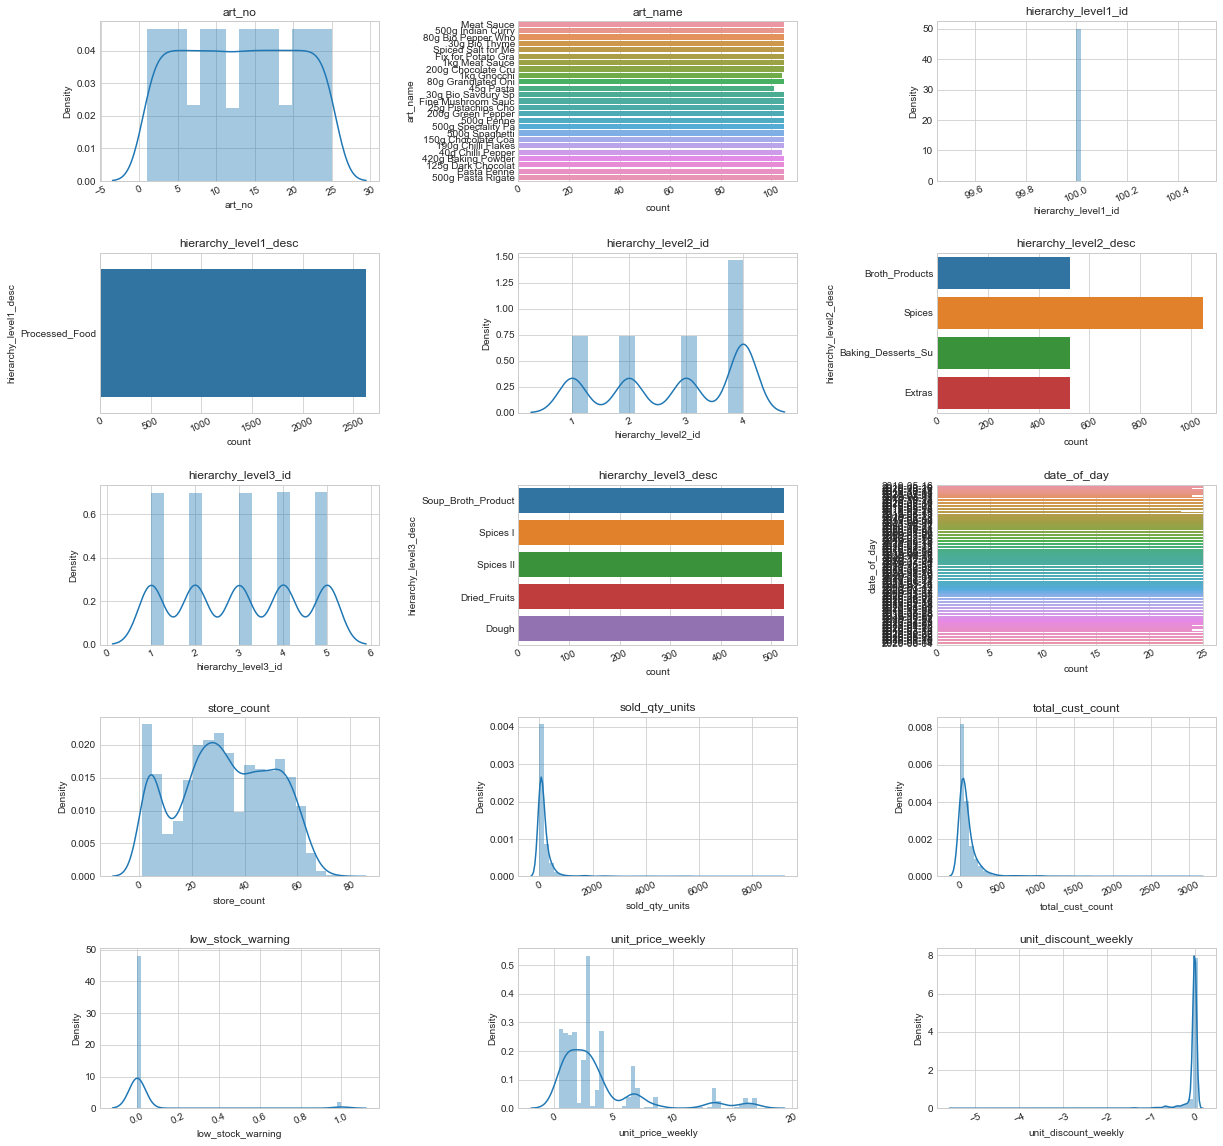

In [48]:
# Plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(data, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [136]:
#converting the dates to datetime format
DT=pd.to_datetime(data['date_of_day'])

In [137]:
data=data.drop('date_of_day',axis=1)

In [138]:
Data_DF = pd.concat([DT,data],axis=1)
Data_DF

,date_of_day,art_no,art_name,hierarchy_level1_id,hierarchy_level1_desc,hierarchy_level2_id,hierarchy_level2_desc,hierarchy_level3_id,hierarchy_level3_desc,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly
0,2019-05-16,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,16,46.0,23,0,0.88,-0.01
1,2019-10-10,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,22,64.0,30,0,0.89,-0.00
2,2020-03-26,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,36,145.0,70,0,0.88,-0.01
3,2019-10-17,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,30,73.0,39,0,0.89,-0.00
4,2019-10-31,10,Meat Sauce,100,Processed_Food,3,Broth_Products,4,Soup_Broth_Products,23,76.0,31,0,0.89,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2020-02-20,22,500g Pasta Rigate,100,Processed_Food,2,Extras,1,Dough,35,261.0,187,0,2.92,-0.07
2615,2020-10-08,22,500g Pasta Rigate,100,Processed_Food,2,Extras,1,Dough,34,230.0,166,0,2.95,-0.04
2616,2020-12-17,22,500g Pasta Rigate,100,Processed_Food,2,Extras,1,Dough,37,918.0,706,0,2.98,-0.01
2617,2019-09-26,22,500g Pasta Rigate,100,Processed_Food,2,Extras,1,Dough,31,157.0,120,0,2.76,-0.03


In [139]:
#dropping the columns which are not important to predict the target variable
Data_Final = Data_DF.drop(['art_name','hierarchy_level1_desc','hierarchy_level2_desc','hierarchy_level3_desc','hierarchy_level1_id','hierarchy_level2_id','hierarchy_level3_id'],axis=1)

In [140]:
#checking the data information and datatypes
Data_Final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2619 entries, 0 to 2618
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   date_of_day           2619 non-null   datetime64[ns]
 1   art_no                2619 non-null   int64         
 2   store_count           2619 non-null   int64         
 3   sold_qty_units        2619 non-null   float64       
 4   total_cust_count      2619 non-null   int64         
 5   low_stock_warning     2619 non-null   int64         
 6   unit_price_weekly     2619 non-null   float64       
 7   unit_discount_weekly  2619 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 163.8 KB


In [141]:
df=Data_Final.drop(['date_of_day'],axis=1)

In [142]:
Data_Final

,date_of_day,art_no,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly
0,2019-05-16,10,16,46.0,23,0,0.88,-0.01
1,2019-10-10,10,22,64.0,30,0,0.89,-0.00
2,2020-03-26,10,36,145.0,70,0,0.88,-0.01
3,2019-10-17,10,30,73.0,39,0,0.89,-0.00
4,2019-10-31,10,23,76.0,31,0,0.89,0.00
...,...,...,...,...,...,...,...,...
2614,2020-02-20,22,35,261.0,187,0,2.92,-0.07
2615,2020-10-08,22,34,230.0,166,0,2.95,-0.04
2616,2020-12-17,22,37,918.0,706,0,2.98,-0.01
2617,2019-09-26,22,31,157.0,120,0,2.76,-0.03


In [143]:
Data_Final['date_of_day'].dt.week

<ipython-input-143-11e0e84af549>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



0       20
1       41
2       13
3       42
4       44
        ..
2614     8
2615    41
2616    51
2617    39
2618    40
Name: date_of_day, Length: 2619, dtype: int64

In [144]:
week = [(x - Data_Final['date_of_day'][0]) for x in list(Data_Final['date_of_day'])]

In [145]:
Data_Final['Week'] = [np.timedelta64(x, 'D').astype(int)/7 for x in week]

In [146]:
Data_Final['week_number']=Data_Final['date_of_day'].dt.week

<ipython-input-146-857022d3e3cf>:1: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



In [147]:
Data_Final['Year_week']=Data_Final['date_of_day'].astype(str).str[0:4]+'-'+Data_Final['week_number'].astype(str)

In [148]:
Data_Final

,date_of_day,art_no,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly,Week,week_number,Year_week
0,2019-05-16,10,16,46.0,23,0,0.88,-0.01,0.0,20,2019-20
1,2019-10-10,10,22,64.0,30,0,0.89,-0.00,21.0,41,2019-41
2,2020-03-26,10,36,145.0,70,0,0.88,-0.01,45.0,13,2020-13
3,2019-10-17,10,30,73.0,39,0,0.89,-0.00,22.0,42,2019-42
4,2019-10-31,10,23,76.0,31,0,0.89,0.00,24.0,44,2019-44
...,...,...,...,...,...,...,...,...,...,...,...
2614,2020-02-20,22,35,261.0,187,0,2.92,-0.07,40.0,8,2020-8
2615,2020-10-08,22,34,230.0,166,0,2.95,-0.04,73.0,41,2020-41
2616,2020-12-17,22,37,918.0,706,0,2.98,-0.01,83.0,51,2020-51
2617,2019-09-26,22,31,157.0,120,0,2.76,-0.03,19.0,39,2019-39


In [149]:
# Encoding 'week' using sine and cosine transform; considering it as a cyclic feature 
Data_Final['week_sin'] = np.sin(2 * np.pi * Data_Final['Week'] / 52.143)
Data_Final['week_cos'] = np.cos(2 * np.pi * Data_Final['Week'] / 52.143)


In [152]:
Data_engineered=Data_Final

In [153]:
def gen_average_units(train,col,name):
    temp=df.groupby(col)['sold_qty_units'].mean().reset_index().rename(columns={'sold_qty_units':name})
    Data_Final=pd.merge(df,temp,how='left',on=col)
    return Data_Final

In [154]:
#Genearting average units sold per 'art_no'
df= gen_average_units(train,col=['art_no'],name='count') 

In [155]:
def gen_average_price(train,test,col,price='unit_price_weekly',name='name'):
    temp=df.groupby(col)[price].mean().reset_index().rename(columns={price:name})
    Data_Final=pd.merge(df,temp,how='left',on=col)
    return Data_Final

In [156]:
Data_Final = gen_average_price(train,test,col=['art_no'],price='unit_price_weekly',name='price_to_art_no') #Genearting average total price per 'art_no'

In [157]:
Data=Data_Final[['count','price_to_art_no']]

In [160]:
result = pd.concat([Data_engineered, Data],axis=1)

In [161]:
result

,date_of_day,art_no,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly,Week,week_number,Year_week,week_sin,week_cos,count,price_to_art_no
0,2019-05-16,10,16,46.0,23,0,0.88,-0.01,0.0,20,2019-20,0.000000,1.000000,110.066667,0.856857
1,2019-10-10,10,22,64.0,30,0,0.89,-0.00,21.0,41,2019-41,0.573778,-0.819011,110.066667,0.856857
2,2020-03-26,10,36,145.0,70,0,0.88,-0.01,45.0,13,2020-13,-0.758315,0.651888,110.066667,0.856857
3,2019-10-17,10,30,73.0,39,0,0.89,-0.00,22.0,42,2019-42,0.471166,-0.882045,110.066667,0.856857
4,2019-10-31,10,23,76.0,31,0,0.89,0.00,24.0,44,2019-44,0.247030,-0.969008,110.066667,0.856857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2614,2020-02-20,22,35,261.0,187,0,2.92,-0.07,40.0,8,2020-8,-0.994219,0.107368,248.504762,2.853048
2615,2020-10-08,22,34,230.0,166,0,2.95,-0.04,73.0,41,2020-41,0.587805,-0.809003,248.504762,2.853048
2616,2020-12-17,22,37,918.0,706,0,2.98,-0.01,83.0,51,2020-51,-0.545217,-0.838295,248.504762,2.853048
2617,2019-09-26,22,31,157.0,120,0,2.76,-0.03,19.0,39,2019-39,0.752671,-0.658397,248.504762,2.853048


In [162]:
#correlation matrix
fig = px.imshow(result.corr())
fig.show()

In [163]:
#describing the final data
result.describe(include='all')

<ipython-input-163-7eb5f3d4c32a>:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,date_of_day,art_no,store_count,sold_qty_units,total_cust_count,low_stock_warning,unit_price_weekly,unit_discount_weekly,Week,week_number,Year_week,week_sin,week_cos,count,price_to_art_no
count,2619,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619.000000,2619,2619.000000,2619.000000,2619.000000,2619.000000
unique,105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,NaN
top,2019-10-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-7,NaN,NaN,NaN,NaN
freq,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25,NaN,NaN,NaN,NaN
first,2019-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2021-02-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,12.999236,32.410462,205.381061,116.203131,0.039710,3.771187,-0.054742,41.093547,26.787323,NaN,-0.004782,0.000435,205.381061,3.771187
std,NaN,7.216768,18.042240,499.907577,217.501756,0.195314,3.778304,0.197052,30.271348,15.158855,NaN,0.709056,0.705407,266.946040,3.765583
min,NaN,1.000000,1.000000,1.000000,1.000000,0.000000,0.450000,-5.460000,-11.000000,1.000000,NaN,-0.999916,-0.999963,5.836538,0.703714
25%,NaN,7.000000,20.000000,37.000000,26.000000,0.000000,1.335000,-0.020000,15.000000,14.000000,NaN,-0.729538,-0.683940,41.942857,1.306571


<h1>Linear Regression</h1>

In [165]:
#splitting the dataset into train and test
train, test = train_test_split(result, test_size=0.3,random_state=42)

In [166]:
#choosing the relevant column with greater correlation to the target variable
XTrain = train[['art_no', 'store_count', 'total_cust_count', 'unit_discount_weekly', 'Week', 'week_sin','week_cos','unit_price_weekly','low_stock_warning','count','price_to_art_no']]
YTrain = train['sold_qty_units']

In [167]:
#choosing the relevant column with greater correlation to the target variable
XTest = test[['art_no', 'store_count', 'total_cust_count', 'unit_discount_weekly', 'Week', 'week_sin','week_cos','unit_price_weekly','low_stock_warning','count','price_to_art_no']]
YTest = test['sold_qty_units']

In [168]:
#fitting the data
LinearMtro = linear_model.LinearRegression(normalize=True)
LinearMtro.fit(XTrain, YTrain)

LinearRegression(normalize=True)

In [169]:
#prediction
YHatTest = LinearMtro.predict(XTest)

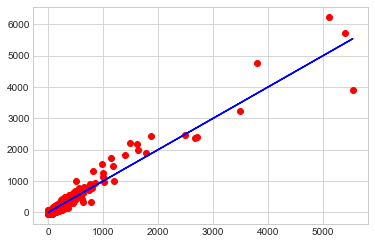

In [170]:
#data plot of predicted vs real
plt.plot(YTest, YHatTest,'ro')
plt.plot(YTest, YTest,'b-')
plt.show()

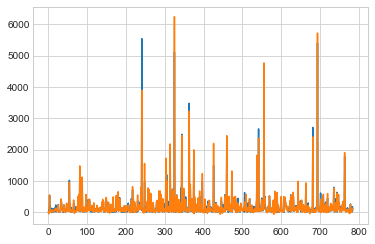

In [171]:
#real vs predicted
plt.plot(YTest.values)
plt.plot(YHatTest)


In [173]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - YHatTest)/YTest))
MSSE = np.mean(np.square(YHatTest - YTest))
RMSE=math.sqrt(MSSE)
print('MAPE:',MAPE,'MSE:',MSSE,'RMSE:',RMSE)

MAPE: 1.3763440235987128 MSE: 13648.660665759584 RMSE: 116.82748249345948


<h1>Catboost Regressor</h1>

In [230]:
#model
model=CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')

In [232]:
#fitting the data
model.fit(XTrain, YTrain,plot=True);

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 485.8456981	total: 5.72ms	remaining: 566ms
1:	learn: 452.4260281	total: 7.45ms	remaining: 365ms
2:	learn: 423.6606328	total: 9.11ms	remaining: 294ms
3:	learn: 396.9677608	total: 10.4ms	remaining: 250ms
4:	learn: 373.0880489	total: 12.4ms	remaining: 236ms
5:	learn: 351.6948702	total: 14.3ms	remaining: 224ms
6:	learn: 336.3819560	total: 16.1ms	remaining: 214ms
7:	learn: 315.4573463	total: 17.5ms	remaining: 202ms
8:	learn: 299.0548791	total: 19.2ms	remaining: 194ms
9:	learn: 283.7283925	total: 20.8ms	remaining: 188ms
10:	learn: 268.8112514	total: 22.5ms	remaining: 182ms
11:	learn: 256.4353856	total: 24.3ms	remaining: 178ms
12:	learn: 244.2257055	total: 25.9ms	remaining: 173ms
13:	learn: 232.9779323	total: 27.5ms	remaining: 169ms
14:	learn: 221.8850993	total: 29.3ms	remaining: 166ms
15:	learn: 211.8438009	total: 30.8ms	remaining: 162ms
16:	learn: 202.6779013	total: 32.2ms	remaining: 157ms
17:	learn: 194.5630423	total: 33.9ms	remaining: 154ms
18:	learn: 189.6034922	total: 35.3ms	r

In [233]:
CBM=model.predict(XTest)

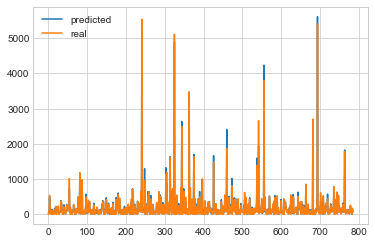

In [243]:
plt.plot(CBM,label='predicted')
plt.plot(YTest.values,label='real')
plt.legend()

In [236]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - CBM)/YTest))
MSSE = np.mean(np.square(CBM - YTest))
RMSE=math.sqrt(MSSE)
print('MAPE:',MAPE,'MSE:',MSSE,'RMSE:',RMSE)

MAPE: 0.6559085846614541 MSE: 4140.141574572573 RMSE: 64.34393191725675


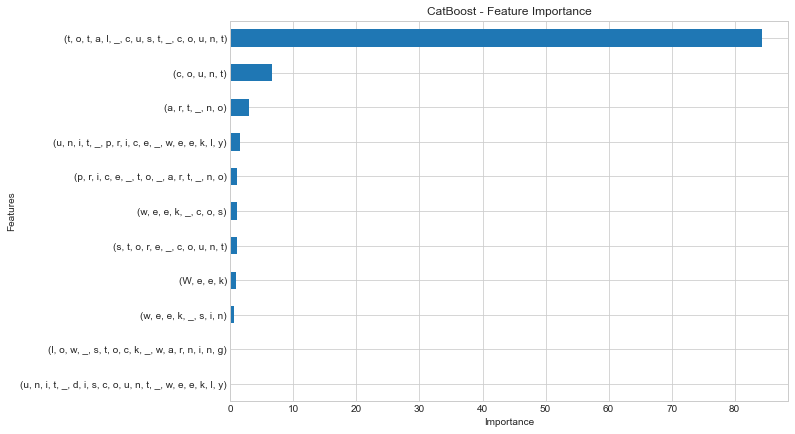

In [176]:
#checking the feature importance
fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': XTrain})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
fea_imp.plot(kind='barh', x='col', y='imp', figsize=(10, 7), legend=None)
plt.title('CatBoost - Feature Importance')
plt.ylabel('Features')
plt.xlabel('Importance');

<h1>LightGBM Model</h1>

In [219]:
# LightGBM dataset formatting 
lgtrain = lgb.Dataset(XTrain, YTrain)

In [178]:
#validation data
lgvalid = lgb.Dataset(XTest, YTest)

In [221]:
#training and testing the model
params = {
    'objective' : 'regression',
    'metric' : 'rmse',
    'num_leaves' : 200,
    'max_depth': 15,
    'learning_rate' : 0.01,
    'feature_fraction' : 0.6,
    'verbosity' : -1,
    'num_boost_round':20000

}
lgb_clf = lgb.train(
    params,
    lgtrain,
    #valid_sets=[lgtrain, lgvalid],
    #valid_names=["train", "valid"],
    #early_stopping_rounds=5000,
    verbose_eval=500
)

In [224]:
Predictions=lgb_clf.predict(XTest)

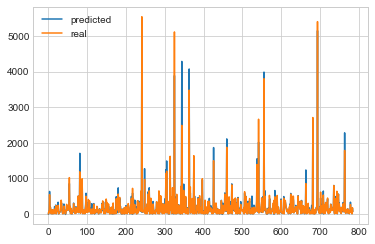

In [241]:
plt.plot(Predictions, label='predicted')
plt.plot(YTest.values,label='real')
plt.legend()
plt.show()

In [229]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - Predictions)/YTest))
MSSE = np.mean(np.square(Predictions - YTest))
RMSE=math.sqrt(MSSE)
print('MAPE:',MAPE,'MSE:',MSSE,'RMSE:',RMSE)

MAPE: 0.322645428066117 MSE: 11211.358592044531 RMSE: 105.88370314663409


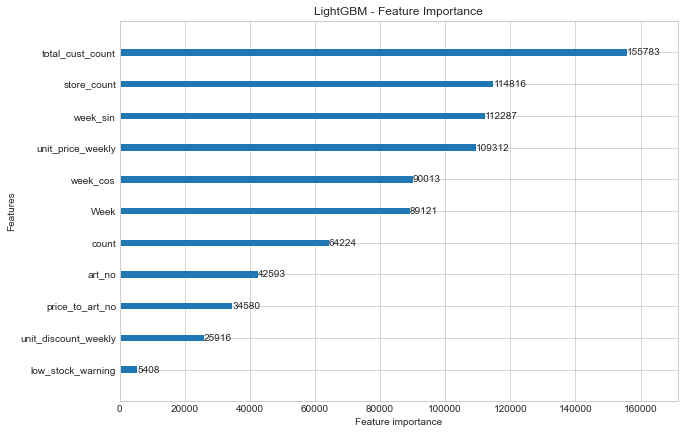

In [228]:
#feature importance
fig, ax = plt.subplots(figsize=(10, 7))
lgb.plot_importance(lgb_clf, max_num_features=30, ax=ax)
plt.title("LightGBM - Feature Importance");

In [181]:
#rmse calculatation
print("RMSE of the validation set:", np.sqrt(mean_squared_error(YTest, lgb_clf.predict(XTest))))


RMSE of the validation set: 107.04093872595477


<h1> Random Forest </h1>

In [253]:
#model
rf_base = RandomForestRegressor()
rf_base.fit(XTrain,YTrain)


rf_tuned = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=True, random_state=None,
                      verbose=0, warm_start=False)
rf_tuned.fit(XTrain,YTrain)

RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=10,
                      n_estimators=600, oob_score=True)

In [254]:
#prediction on the base model
prediction_rfb_valid=rf_base.predict(XTest)

In [255]:
#prediction on the tuned model
prediction_rft_valid=rf_tuned.predict(XTest)

In [256]:
#msle for base model
rf_base_msle=100*mean_squared_log_error(YTest,prediction_rfb_valid)

In [257]:
#msle for tuned model
rf_tuned_msle=100*mean_squared_log_error(YTest,prediction_rft_valid)

In [258]:
#log errors
print("RF Base: {}; RF Tuned: {}".format(rf_base_msle,rf_tuned_msle))

RF Base: 2.1324459188357086; RF Tuned: 4.15258639483114


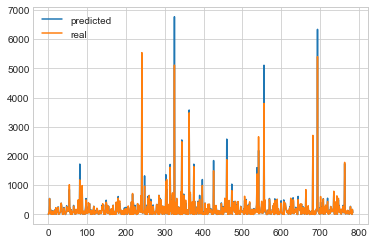

In [259]:
#predicion vs real for base model
plt.plot(prediction_rfb_valid, label='predicted')
plt.plot(YTest.values,label='real')
plt.legend()

In [260]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - prediction_rfb_valid)/YTest))
MSSE = np.mean(np.square(prediction_rfb_valid - YTest))
RMSE=math.sqrt(MSSE)
print('MAPE:',MAPE,'MSE:',MSSE,'RMSE:',RMSE)

MAPE: 0.1045723164750966 MSE: 11219.087390966923 RMSE: 105.92019349947829


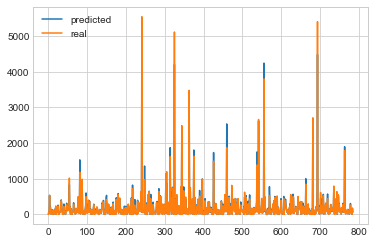

In [264]:
#prediction vs real for tuned model
plt.plot(prediction_rft_valid, label='predicted')
plt.plot(YTest.values,label='real')
plt.legend()

In [262]:
# calculate the accuray of the model by sum of Square and mean absolute prediction error
MAPE = np.mean(abs((YTest - prediction_rft_valid)/YTest))
MSSE = np.mean(np.square(prediction_rft_valid - YTest))
RMSE=math.sqrt(MSSE)
print('MAPE:',MAPE,'MSE:',MSSE,'RMSE:',RMSE)

MAPE: 0.16907128820363146 MSE: 7271.688836426604 RMSE: 85.27419795240881


After evaluating all the models RMSE of Catboost came out to be around 64 and for Random forest tuned model it came out to be 85.8. the smaller the RMSE the better is the predicted forecast.
So, this means these two models performed relatively better than other models on this data.
It can also be improved further if:<br>
    1. we add more data <br>
    2. we introduce more features in this data.<br>
    

I have also run the LSTM model in the attached python file. The RMSE for the model is: 170.380 